In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [3]:
data = pd.read_csv('delivery_time.csv')
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
deliv_time = pd.Series(data.iloc[:,0])


In [6]:
sort_time = pd.Series(data.iloc[:,1])


In [7]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

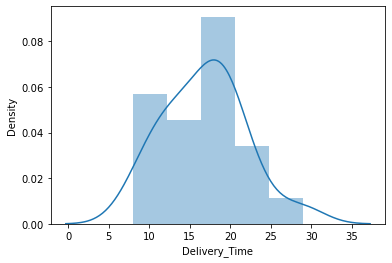

In [8]:
sns.distplot(data['Delivery_Time'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

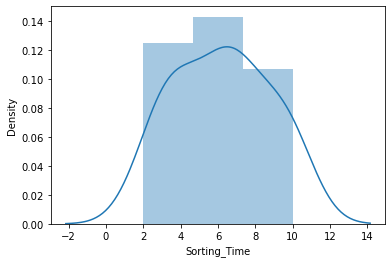

In [9]:
sns.distplot(data['Sorting_Time'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_Time'>

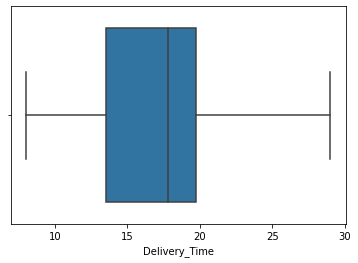

In [13]:
sns.boxplot(data['Delivery_Time'])
#It is slightly left-skewed. Absence of Outliers

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting_Time'>

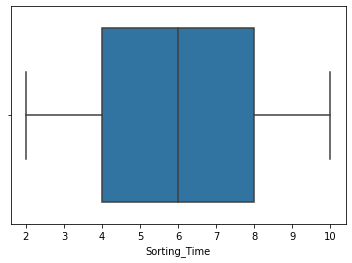

In [12]:
sns.boxplot(data['Sorting_Time'])
#It is normally distributed. Absence of Outliers.

In [14]:
model = smf.ols('Delivery_Time~Sorting_Time', data = data).fit()
model.summary()
#R-squared:	0.682

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           3.98e-06
Time:                        17:04:28   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

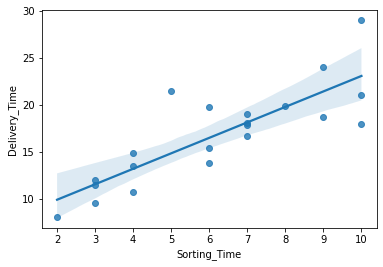

In [48]:
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=data);
#equation : y=B0 + B1x where y is delivery time and x is sorting time

In [19]:
x = pd.DataFrame(data.iloc[:, 1:2])
y = pd.DataFrame(data.iloc[:, 0:1])

<AxesSubplot:>

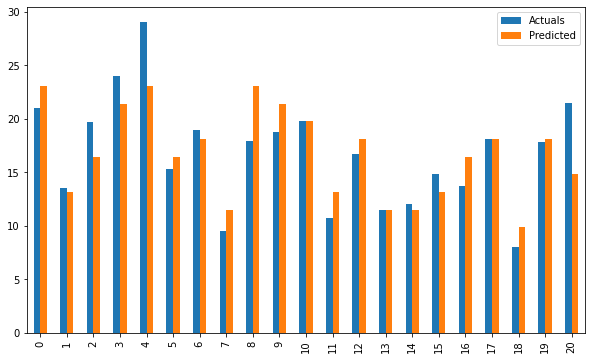

In [22]:
del_pred = model.predict(x)
del_lst = y.Delivery_Time.values.tolist()
del_pred_lst = del_pred.tolist()
datap = [del_lst, del_pred_lst]
res = pd.DataFrame({'Actuals':datap[0], 'Predicted':datap[1]})
res.plot(kind='bar',figsize=(10,6))

In [25]:
import numpy as np
data['log_sort'] = np.log(data['Sorting_Time'])
data['sq_sort'] = np.square(data['Sorting_Time'])
data['sqrt_sort'] = np.sqrt(data['Sorting_Time'])
ylog = pd.DataFrame(data.iloc[:, 2:3])
ysq= pd.DataFrame(data.iloc[:, 3:4])
ysqrt = pd.DataFrame(data.iloc[:, 4:5])
data.head()

,Delivery_Time,Sorting_Time,log_sort,sq_sort,sqrt_sort
0,21.00,10,2.302585,100,3.162278
1,13.50,4,1.386294,16,2.000000
2,19.75,6,1.791759,36,2.449490
3,24.00,9,2.197225,81,3.000000
4,29.00,10,2.302585,100,3.162278


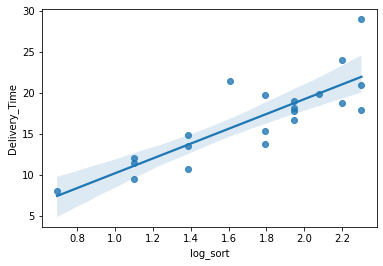

In [29]:
sns.regplot(x="log_sort", y="Delivery_Time", data=data);

In [30]:
model_log = smf.ols('Delivery_Time~log_sort', data = data).fit()
model_log.summary()
#R-squared:	0.695

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           2.64e-06
Time:                        17:14:12   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
log_sort       9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

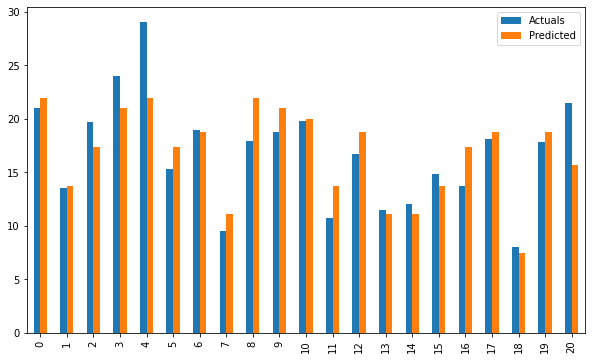

In [31]:
del_predlog = model_log.predict(ylog)
del_lst = y.Delivery_Time.values.tolist()
del_predlog_lst = del_predlog.tolist()
dataplog = [del_lst, del_predlog_lst]
res = pd.DataFrame({'Actuals':dataplog[0], 'Predicted':dataplog[1]})
res.plot(kind='bar',figsize=(10,6))

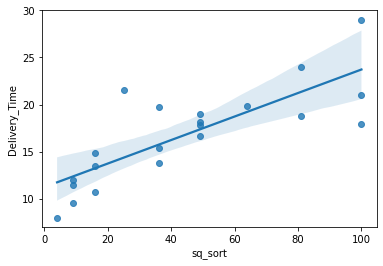

In [32]:
sns.regplot(x="sq_sort", y="Delivery_Time", data=data);

In [33]:
model_sq = smf.ols('Delivery_Time~sq_sort', data = data).fit()
model_sq.summary()
#R-squared:	0.630

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           1.74e-05
Time:                        17:16:58   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2372      1.196      9.399      0.000       8.735      13.740
sq_sort        0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

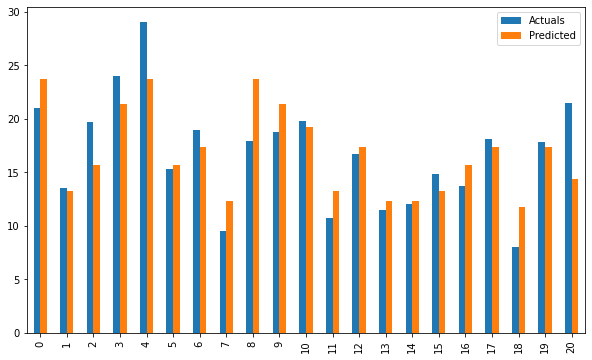

In [36]:
del_predsq = model_sq.predict(ysq)
del_predsq_lst = del_predsq.tolist()
datapsq = [del_lst, del_predsq_lst]
res = pd.DataFrame({'Actuals':datapsq[0], 'Predicted':datapsq[1]})
res.plot(kind='bar',figsize=(10,6))

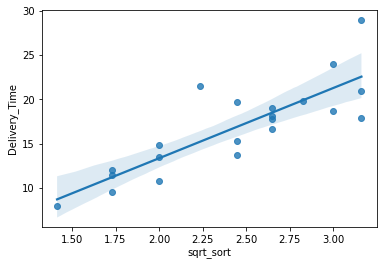

In [28]:
sns.regplot(x="sqrt_sort", y="Delivery_Time", data=data);

In [39]:
model_sqrt = smf.ols('Delivery_Time~sqrt_sort', data = data).fit()
model_sqrt.summary()
#R-squared:	0.696

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           2.61e-06
Time:                        17:20:33   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
sqrt_sort      7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

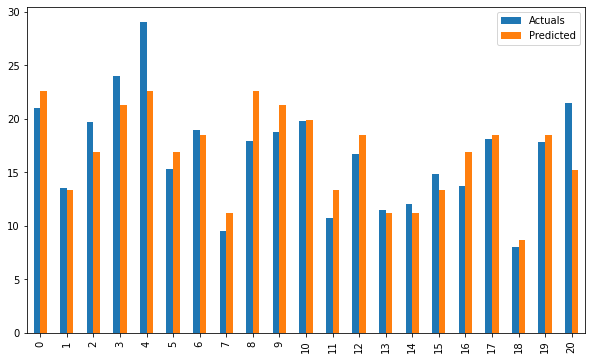

In [40]:
del_predsqrt = model_sqrt.predict(ysqrt)
del_predsqrt_lst = del_predsqrt.tolist()
datapsqrt = [del_lst, del_predsqrt_lst]
res = pd.DataFrame({'Actuals':datapsqrt[0], 'Predicted':datapsqrt[1]})
res.plot(kind='bar',figsize=(10,6))